# FACE MASK DETECTION

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Activation, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop

### Dataset

In [3]:
train_dir = r'C:\Users\Sandhya H\Downloads\archive\New Masks Dataset\Train'
validation_dir = r'C:\Users\Sandhya H\Downloads\archive\New Masks Dataset\Validation'
test_dir = r'C:\Users\Sandhya H\Downloads\archive\New Masks Dataset\Test'

### Data Preprocessing

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 10, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 10, class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


### Model

In [5]:
model = Sequential([Conv2D(100, (3,3), activation = 'relu', input_shape = (150, 150, 3)), 
                    MaxPooling2D(2,2),
                    Conv2D(100, (3,3), activation = 'relu'), 
                    MaxPooling2D(2,2), 
                    Flatten(), 
                    Dropout(0.5), 
                    Dense(50, activation = 'relu'),
                    Dense(2, activation = 'softmax')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                6

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(learning_rate = 2e-5), metrics = ['acc'])

In [8]:
checkpoint = ModelCheckpoint('best_model.h5', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

In [9]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator, 
                    callbacks = [checkpoint])

Epoch 1/50
60/60 [==============================] - 53s 870ms/step - loss: 0.6797 - acc: 0.5450 - val_loss: 0.6318 - val_acc: 0.6732
Epoch 2/50
60/60 [==============================] - 44s 729ms/step - loss: 0.5791 - acc: 0.7067 - val_loss: 0.5515 - val_acc: 0.7026
Epoch 3/50
60/60 [==============================] - 42s 707ms/step - loss: 0.4902 - acc: 0.7933 - val_loss: 0.4780 - val_acc: 0.7941
Epoch 4/50
60/60 [==============================] - 42s 701ms/step - loss: 0.4661 - acc: 0.8017 - val_loss: 0.4290 - val_acc: 0.8105
Epoch 5/50
60/60 [==============================] - 42s 704ms/step - loss: 0.4370 - acc: 0.8033 - val_loss: 0.4068 - val_acc: 0.8431
Epoch 6/50
60/60 [==============================] - 41s 681ms/step - loss: 0.4106 - acc: 0.8150 - val_loss: 0.4417 - val_acc: 0.8105
Epoch 7/50
60/60 [==============================] - 41s 676ms/step - loss: 0.3747 - acc: 0.8383 - val_loss: 0.3399 - val_acc: 0.8595
Epoch 8/50
60/60 [==============================] - 42s 699ms/step - 

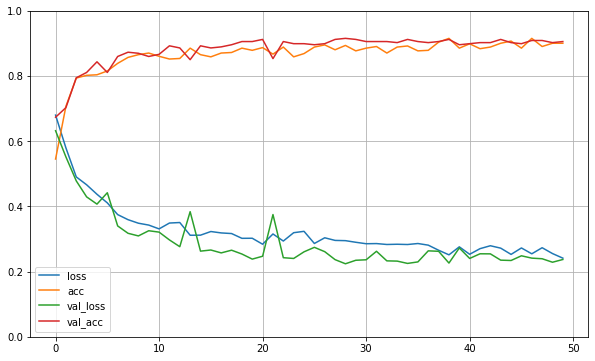

In [10]:
pd.DataFrame(history.history).plot(figsize = (10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [6]:
tf.keras.backend.clear_session()

In [7]:
model = tf.keras.models.load_model("best_model.h5")

### Performance Evaluation

In [8]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 10, class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [9]:
model.evaluate(test_generator)

10/10 [==============================] - 5s 523ms/step - loss: 0.1932 - acc: 0.9200


[0.19316793978214264, 0.9200000166893005]

Here a 92 % accuracy on test dataset is obtained. 